In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import pandas as pd

In [2]:
hdul=fits.open('swbj0243_7p6126_d2407.lc.gz')
hdul[1].header

XTENSION= 'BINTABLE'           / Binary table extension                         
BITPIX  =                    8 / Array data type                                
NAXIS   =                    2 / Number of array dimensions                     
NAXIS1  =                   68 / Number of bytes per row                        
NAXIS2  =                 2223 / Number of rows                                 
PCOUNT  =                    0 / Number of group parameters                     
GCOUNT  =                    1 / Number of groupsK count                        
TFIELDS =                   11 / Number of table fields                         
EXTNAME = 'LIGHTCURVE'         / Extension name                                 
VERSION0= '110818  '           / Version of analyze_scaled_maps_WORK            
VERSION1= '060918  '           / Version of plot_scaled_maps                    
CATNUM  =                34120 / BAT catalog number                             
TIMEDEL =              1.000

In [3]:
time=hdul[1].data['TIME']
rate=hdul[1].data['RATE']
error=hdul[1].data['ERROR']
flag=hdul[1].data['DATA_FLAG']

In [4]:
time=time[flag==0]
rate=rate[flag==0]
error=error[flag==0]

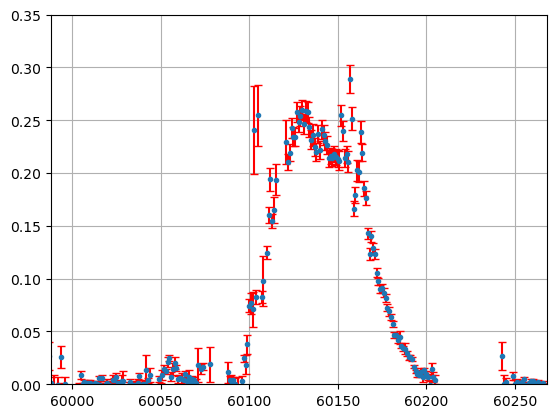

In [5]:
plt.errorbar(time, rate, yerr=error, fmt='o', ecolor='r', capsize=3, markersize=3,markeredgewidth=1)
plt.xlim(59988,60268)
plt.ylim(0,0.35)
plt.grid()

In [8]:
df=pd.read_csv('/home/supremekai/thesis/J0243_6p6124/nicer/all_lc_periods_evt_files_bary_orbit.txt',sep='\t')
df_sorted = df.sort_values(by='TSTARTI')
date=df_sorted['TSTARTI']
period=df_sorted['Period']
freq=1000/period

df1=pd.read_csv('/home/supremekai/thesis/J0243_6p6124/nicer/bootstrap_all_lc.txt',sep='\t')
df_sorted1 = df1.sort_values(by='TSTARTI')
date1=df_sorted1['TSTARTI']
period1=df_sorted1['Mean_Period']
stddev1=df_sorted1['Standard_Deviation']
freq1=df_sorted1['freq']
freqerr1=freq1*(stddev1/period1)

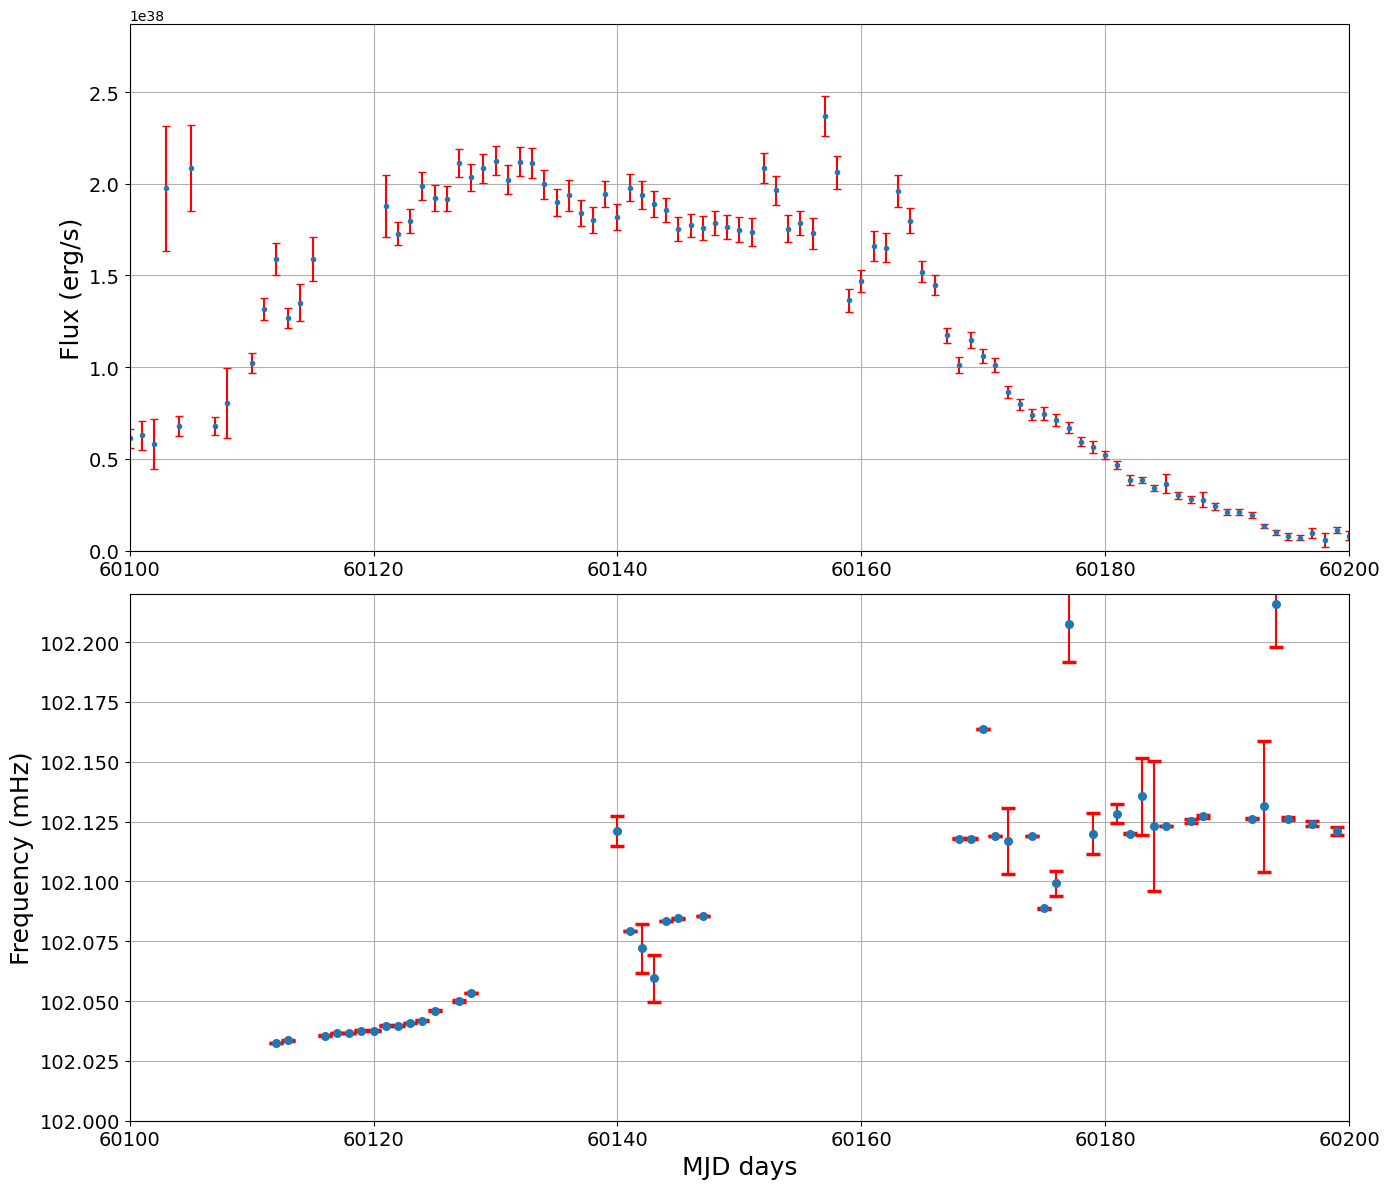

In [29]:
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Upper panel (Swift flux vs MJD)
ax[0].errorbar(time, rate * 8.2 * 10**38, yerr=error * 8.2 * 10**38, 
               fmt='o', ecolor='r', capsize=3, markersize=3, markeredgewidth=1)
ax[0].set_xlim(60100, 60200)
ax[0].set_ylim(0, 0.35 * 8.2 * 10**38)
ax[0].grid()
ax[0].set_ylabel(r'Flux (erg/s)', fontsize=18)  # Increase y-axis label font size
ax[0].tick_params(axis='both', labelsize=14)   # Increase tick label font size

# Lower panel (Frequency vs MJD)
ax[1].errorbar(date1 + 40000, freq, yerr=freqerr1, 
               fmt='o', ecolor='r', capsize=5, markersize=4, markeredgewidth=2.5)
ax[1].set_xlim(60100, 60200)
ax[1].set_ylim(102, 102.22)
ax[1].grid()
ax[1].set_xlabel('MJD days', fontsize=18)       # Increase x-axis label font size
ax[1].set_ylabel('Frequency (mHz)', fontsize=18)  # Increase y-axis label font size
ax[1].tick_params(axis='both', labelsize=14)   # Increase tick label font size

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Optional: Add a caption below the plot if needed
# fig.text(0.5, -0.02, 
#          "Upper panel shows SWIFT BAT count rate at relevant MJDs and Lower panel shows NICER efsearch period estimates", 
#          horizontalalignment='center', fontsize=12)

plt.show()

In [8]:

def plot_lightcurves(fits_file):
    # Initialize arrays for time, rates, and errors
    time_combined = np.array([])
    rate1_combined = np.array([])
    error_combined = np.array([])
    
    # Open the FITS file and loop over each HDU
    with fits.open(fits_file) as hdul:
        for hdu in hdul[1:]:  # Skip the primary HDU
            data = hdu.data
            
            # Extract TIME, RATE, and ERROR from the data
            time = data['TIME']
            rate1 = data['RATE']
            error = data['ERROR']  # Assuming the error column is named 'ERROR'
            
            # Combine the data across HDUs
            time_combined = np.concatenate([time_combined, time])
            rate1_combined = np.concatenate([rate1_combined, rate1])
            error_combined = np.concatenate([error_combined, error])
    
    # Plot the light curve with error bars
    plt.figure(figsize=(10, 6))
    plt.errorbar(time_combined, rate1_combined, yerr=error_combined, fmt='o', ecolor='r', capsize=3, markersize=3,markeredgewidth=1)
    plt.xlabel('Time')
    plt.ylabel('Rate')
    plt.title('Light Curve')
    plt.grid(True)



(0.0, 0.4)

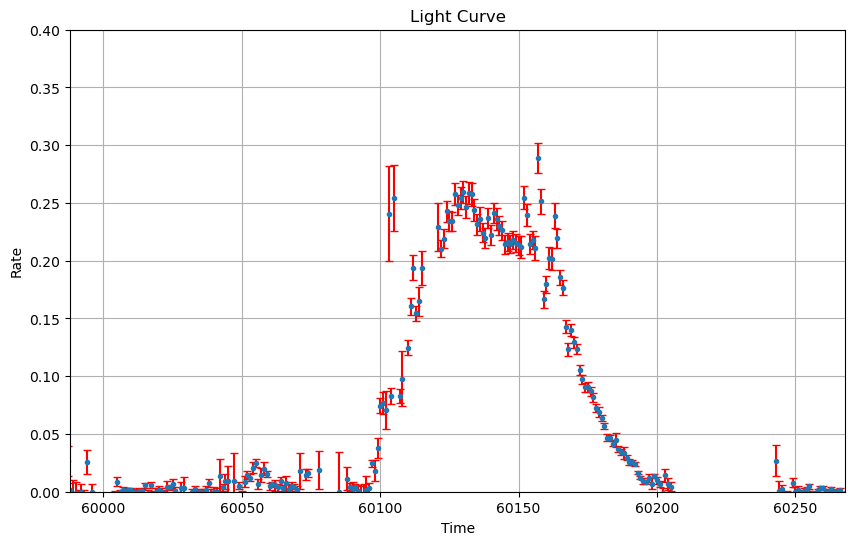

In [9]:
# Plotting Rate1 vs MJD Time
plot_lightcurves('swbj0243_7p6126_d2407.lc.gz')
plt.xlim(59988,60268)
plt.ylim(0,0.4)

In [49]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import mplcursors
from astropy.time import Time

def plot_lightcurves(fits_file):
    # Initialize arrays for time, rates, and errors
    time_combined = np.array([])
    rate1_combined = np.array([])
    error_combined = np.array([])
    flag_combined= np.array([])
    with fits.open(fits_file) as hdul:
        for hdu in hdul[1:]:  # Skip the primary HDU
            data = hdu.data

            # Extract TIME, RATE, and ERROR from the data
            time = data['TIME']
            rate1 = data['RATE']
            error = data['ERROR']  # Assuming the error column is named 'ERROR'
            flag= data['DATA_FLAG']

            # Combine the data across HDUs
            time_combined = np.concatenate([time_combined, time])
            rate1_combined = np.concatenate([rate1_combined, rate1])
            error_combined = np.concatenate([error_combined, error])
            flag_combined= np.concatenate([flag_combined, flag])

            time_combined = time_combined[flag_combined<1]
            rate1_combined = rate1_combined[flag_combined<1]
            error_combined = error_combined[flag_combined<1]
    
        # Convert UTC start times to MJD
        utc_start_times_markers = [
           #"2023-04-10T15:03:28",
            "2023-06-17T10:28:32", 
            "2023-07-05T05:41:40", 
            "2023-08-18T01:42:52", 
            "2023-09-16T06:00:40"
        ]

        utc_start_times = [
            "2023-04-10T15:03:28",
            "2023-06-02T10:28:32", 
            "2023-09-16T06:00:40"
        ]

        # Convert UTC strings to MJD
        utc_start_times = Time(utc_start_times, format='isot')
        mjd_start_times = utc_start_times.mjd

        utc_start_times_markers = Time(utc_start_times_markers, format='isot')
        mjd_start_times_markers = utc_start_times_markers.mjd

        # Plot the light curve with error bars
        plt.figure(figsize=(20, 12))
        plt.errorbar(time_combined, rate1_combined*8.2 * 10**38, yerr=error_combined*8.2 * 10**38, fmt='o', ecolor='r', capsize=3, 
                     label='Rate with Error', markersize=4, markeredgewidth=0.5)

        plt.axvspan(mjd_start_times[0],mjd_start_times[0]+52,alpha=0.1,color='b',label='pre-outburst')
        plt.axvspan(mjd_start_times[1],mjd_start_times[1]+104,alpha=0.1,color='g',label='mid-outburst')
        plt.axvspan(mjd_start_times[2],mjd_start_times[2]+100,alpha=0.1,color='cyan',label='post-outburst')

    #    Plot vertical lines for exposure starts
        for mjd_start in mjd_start_times_markers:
            # plt.axvline(x=mjd_start, color='r', linestyle='--', label=f'Start: {Time(mjd_start, format="mjd").iso[:10]}')
            plt.axvline(x=mjd_start, color='r', linestyle='--')
        
        
        
        
        plt.xlabel('Time (MJD)')
        plt.ylabel('Rate')
        plt.title('Light Curve')
        plt.legend()
        plt.grid(True)

        # Enable interactive cursor
        #mplcursors.cursor(hover=True)
        plt.xlim(60000,60300)
        plt.ylim(-0.01*8.2 * 10**38,0.35*8.2 * 10**38)
        plt.show()


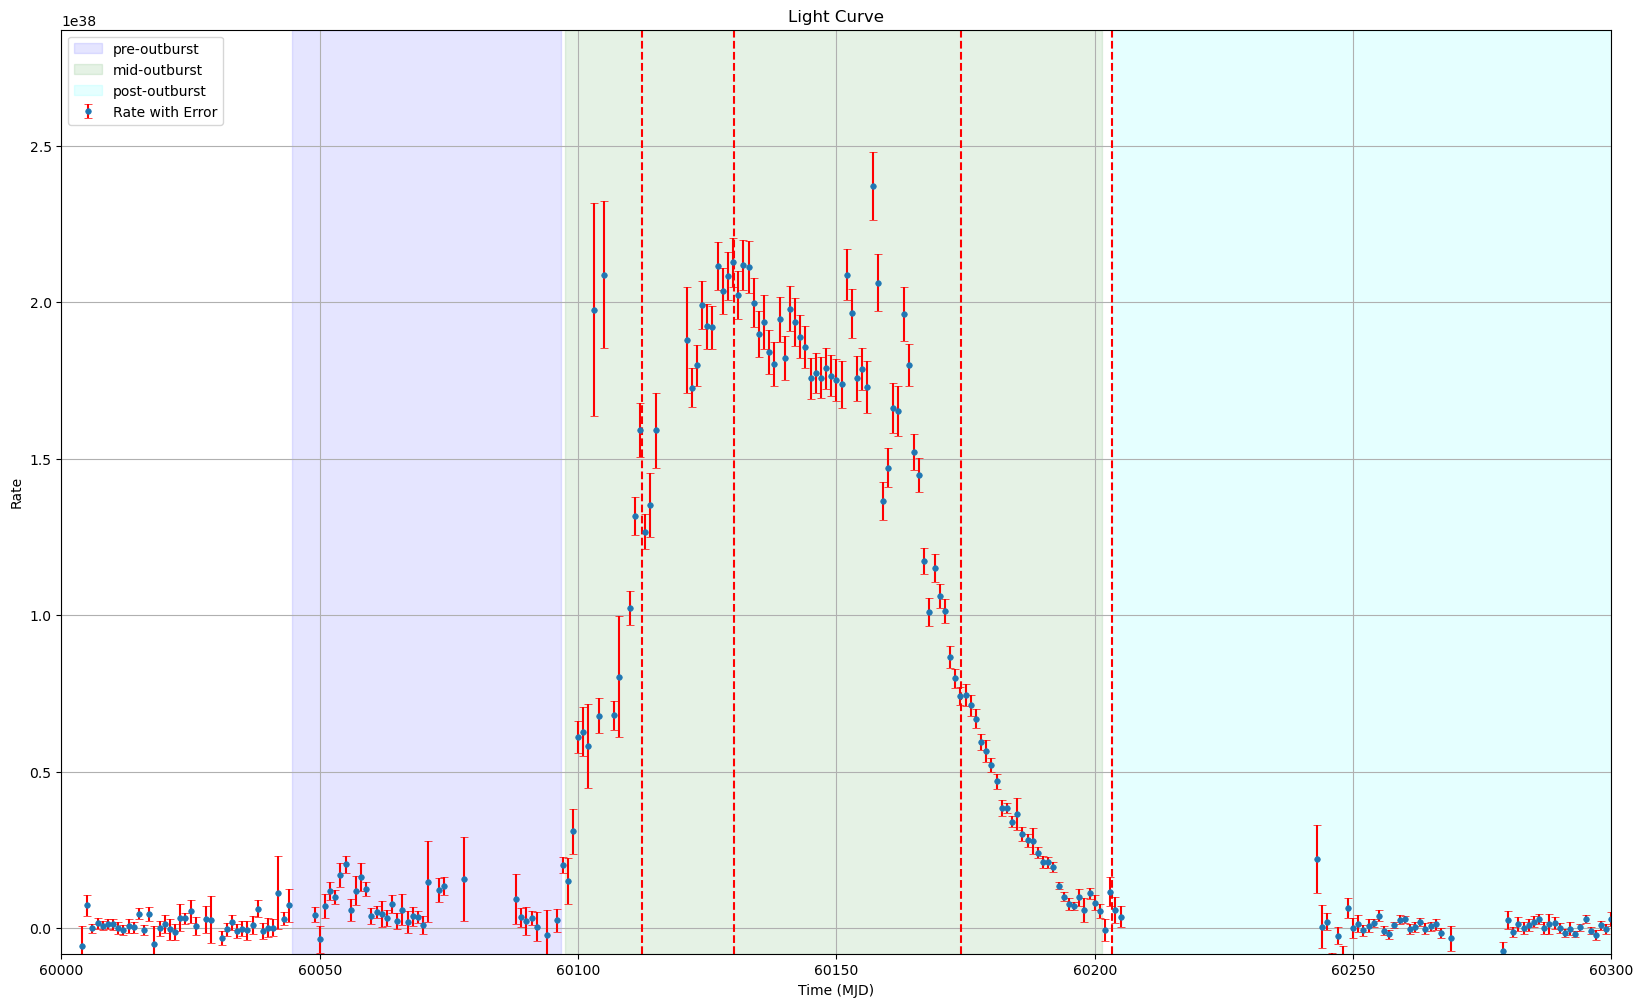

In [50]:
# Plotting Rate1 vs MJD Time
plot_lightcurves('swbj0243_7p6126_d2407.lc.gz')


In [12]:
with fits.open('swbj0243_7p6126_d2407.lc.gz') as hdul:
        # Initialize arrays for time, rates, and errors
        time_combined = np.array([])
        rate1_combined = np.array([])
        error_combined = np.array([])
        flag_combined= np.array([])
        for hdu in hdul[1:]:  # Skip the primary HDU
            data = hdu.data
            
            # Extract TIME, RATE, and ERROR from the data
            time = data['TIME']
            rate1 = data['RATE']
            error = data['ERROR']  # Assuming the error column is named 'ERROR'
            flag= data['DATA_FLAG']
            
            # Combine the data across HDUs
            time_combined = np.concatenate([time_combined, time])
            rate1_combined = np.concatenate([rate1_combined, rate1])
            error_combined = np.concatenate([error_combined, error])
            flag_combined= np.concatenate([flag_combined, flag])

In [13]:
np.unique(flag_combined)

array([0., 2., 3.])

In [14]:
print(rate1_combined[time_combined==60044],rate1_combined[time_combined==60047],
rate1_combined[time_combined==60112],
rate1_combined[time_combined==60130],
rate1_combined[time_combined==60174],
rate1_combined[time_combined==60203])

[0.0089357] [0.00922004] [0.19404365] [0.2593448] [0.09031704] [0.01413414]
